<a href="https://colab.research.google.com/github/ArasHEsLaM1/machine_learning_with_python_jadi/blob/main/arima_gu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 698 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
df1=yf.download("GBPUSD=X",start="1990-01-01",end="2022-12-7")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.723811,1.727205,1.718390,1.718597,1.718597,0
2003-12-02,1.719010,1.732112,1.717298,1.730313,1.730313,0
2003-12-03,1.730493,1.731812,1.725209,1.728101,1.728101,0
2003-12-04,1.727414,1.728997,1.718302,1.720697,1.720697,0
2003-12-05,1.720608,1.733102,1.719809,1.733102,1.733102,0
...,...,...,...,...,...,...
2022-11-30,1.194386,1.202747,1.190377,1.194686,1.194686,0
2022-12-01,1.207554,1.229695,1.207365,1.207750,1.207750,0
2022-12-02,1.225445,1.229649,1.213916,1.225926,1.225926,0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
df= pd.read_csv("/content/GBUSD.csv")
#split the data 
to_row=int(len(df)*0.9) #90% become testing data :D it is too much
train_data= list(df[0:to_row]['Close'])
test_data= list(df[to_row:]['Close'])


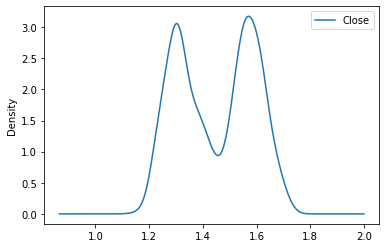

In [ ]:
df.plot(kind='kde')

lenght of data frame is : 3126


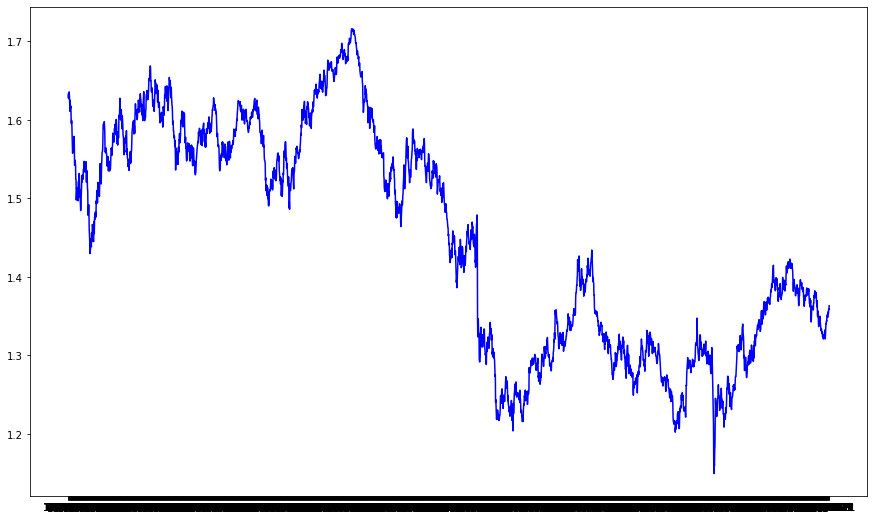

In [ ]:
plt.figure(figsize=(15,9))
plt.plot(df['Date'], df['Close'], color="blue")
print("lenght of data frame is :",len(df))

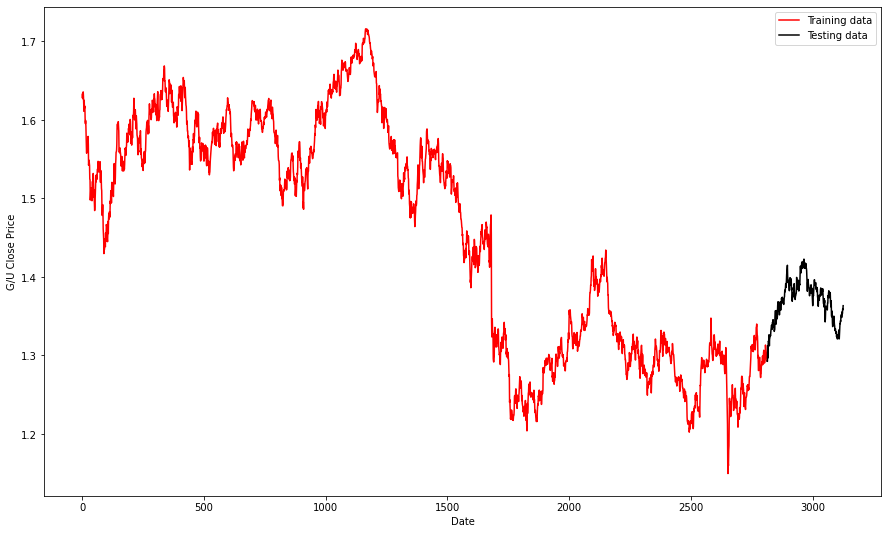

In [ ]:
 
 plt.figure(figsize=(15,9))
 plt.xlabel('Date')
 plt.ylabel('G/U Close Price')
 plt.plot(df[0:to_row]["Close"], 'red', label='Training data')
 plt.plot(df[to_row:]["Close"], 'black', label='Testing data')
 plt.legend()

In [ ]:
model_predictions=[]
n_test_observation=len(test_data)

In [ ]:
for i in range(n_test_observation):
  model = ARIMA(train_data, order=(4,1,0)) #Input , P,D,Q (AUTO ARIMA AUTOMATICALLY CHANGE THESE NUMBERS)
  model_fit=model.fit()
  output = model_fit.forecast()
  yhat=list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_val=test_data[i]
  train_data.append(actual_test_val)
 #print(output)
  


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3124
Model:                 ARIMA(4, 1, 0)   Log Likelihood               10713.687
Method:                       css-mle   S.D. of innovations              0.008
Date:                Thu, 10 Nov 2022   AIC                         -21415.375
Time:                        03:38:45   BIC                         -21379.093
Sample:                             1   HQIC                        -21402.351
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.665e-05      0.000     -0.619      0.536      -0.000       0.000
ar.L1.D.y      0.0008      0.018      0.045      0.964      -0.034       0.036
ar.L2.D.y      0.0129      0.018      0.723      0.4

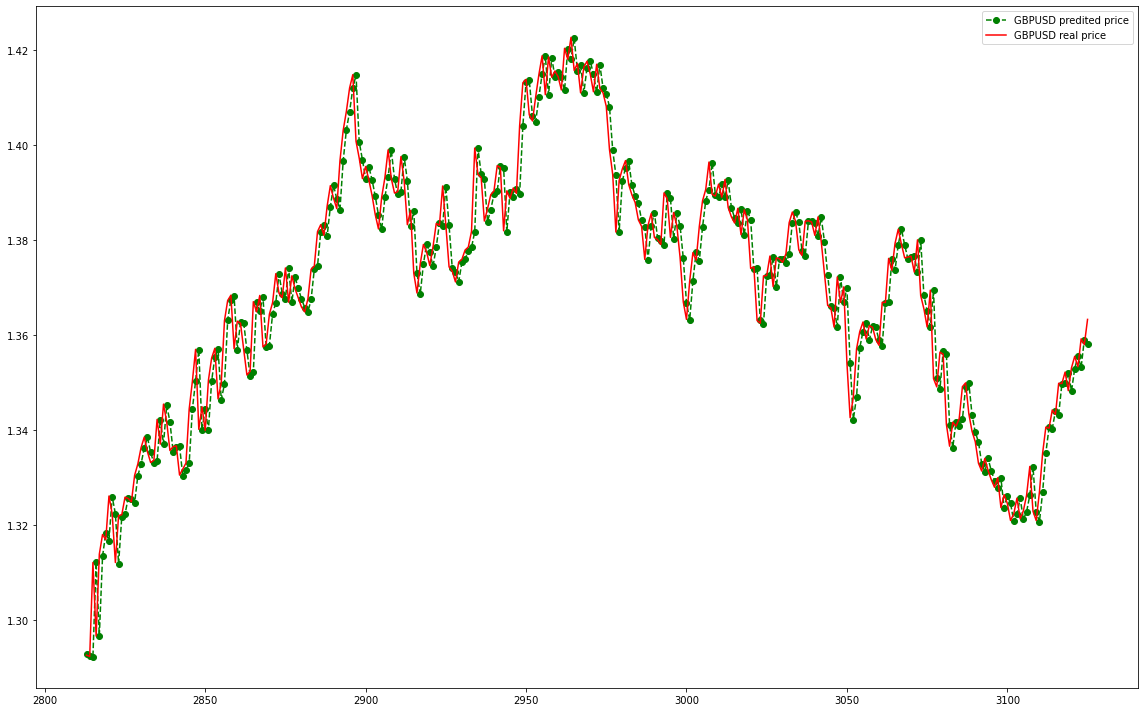

In [ ]:
plt.figure(figsize=(16,10))
date_range=df[to_row:].index
plt.plot(date_range,model_predictions, color="green", marker="o", linestyle='dashed',label="GBPUSD predited price")
plt.plot(date_range,test_data, color="red",label="GBPUSD real price")
plt.legend()
plt.show()

In [ ]:
# MODEL PREDICTION EVALUATION USING MAPE, RMSE, MAE, NRMSE
#3.8% MAPE percentage represents the model is about 96.2% accurate in prediction the test set
#mape= np.mean(np.abs(np.array(model_predictions[])- np.array(test_data))/np.abs(test_data))
#print('MAPE = '+str(mape))
from sklearn.metrics import r2_score
print("r2 Score: ", r2_score(test_data, model_predictions))
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(test_data, model_predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(test_data, model_predictions))))
MAPE=str(mean_absolute_percentage_error(test_data, model_predictions))
print("SHEER MAPE VALUE IS: ",MAPE)

print("Root Mean percentage Error - MAPE : " + str(mean_absolute_percentage_error(test_data, model_predictions)))

r2 Score:  0.9504751934871692
Mean Absolute Error - MAE : 0.004650313572049126
Root Mean squared Error - RMSE : 0.0059732614629560855
SHEER MAPE VALUE IS:  0.003399469185643565
Root Mean percentage Error - MAPE : 0.003399469185643565


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.table.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)  # where df is your data frame

plt.savefig('mytable.png')

ModuleNotFoundError: ignored